The primary goal of this project was to implement a K-nearest neighbors (KNN) classifier on a dataset, evaluate its performance, and carry out an analysis on the feature influence. We've used the pandas library to import and manipulate data, seaborn and matplotlib for data visualization, scikit-learn for model training and evaluation, and SHAP (SHapley Additive exPlanations) for interpreting the model's predictions.

> Note that I feel there is too little testing data, so for the later part, I choose to use data from other pages to test the model.

# 1-Data Exploration and Visualization

In [83]:
import pandas as pd
import numpy as np

data_frame = pd.read_excel('Data.xlsx', sheet_name=1, skiprows=1)
print(type(data_frame))
print(data_frame.head())

In [85]:
#determine null values
data_frame.isnull().sum()

MIN                     0
MAX                     0
Mean                    0
Mode                    0
Median                  0
Variance                0
Standard Deviation      0
MIN.1                   0
MAX.1                   0
Mean.1                  0
Mode.1                  0
Median.1                0
Variance.1              0
Standard Deviation.1    0
MIN.2                   0
MAX.2                   0
Mean.2                  0
Mode.2                  0
Median.2                0
Variance.2              0
Standard Deviation.2    0
Labels                  0
dtype: int64

<Axes: >

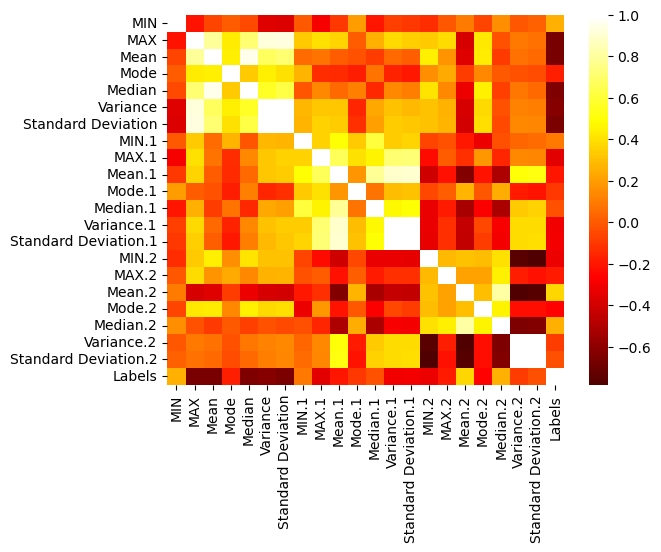

In [86]:
import seaborn as sns

corr_matrix = data_frame.corr()
sns.heatmap(corr_matrix, cmap = 'hot', center = 0)

The data was then split into features and labels. The last column was considered as the label (target variable), and all the other columns were considered as features.

The dataset was then split into a training set (80% of the original data) and a testing set (20% of the original data). This was done using scikit-learn's train_test_split function, which also shuffles the data.

In [87]:
# seperate data into features and lables
from sklearn.model_selection import train_test_split

features = data_frame.iloc[:, :-1]
labels = data_frame.iloc[:, -1]  

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=3)

In [88]:
train_X = train_features.values
test_X = test_features.values
train_y = train_labels.values
test_y = test_labels.values

# 2-Classification

In [89]:
#	Implement each classifier on the dataset and evaluate its performance.
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(train_X,train_y)

KNeighborsClassifier()

In [90]:
predict = KNN.predict(test_X)

In [91]:
print(predict)
print(test_y)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predict)
print("Accuracy: ", accuracy)

[1 1 0 0 1]
[1 1 0 0 1]
Accuracy:  1.0


In [92]:
df2 = pd.read_excel('Data.xlsx', sheet_name=5, skiprows=1)

features = df2.iloc[:, :-1] 
labels = df2.iloc[:, -1]  

X = features.values
y = labels.values

predict = KNN.predict(X)
accuracy = accuracy_score(y, predict)
print("Accuracy: ", accuracy)

Accuracy:  0.8571428571428571


According to the figure below, it can be observed that this model misclassifies three instances of 1 as 0, and two instances of 0 as 1. From this, we can infer that the model is more prone to classifying 1 as 0.

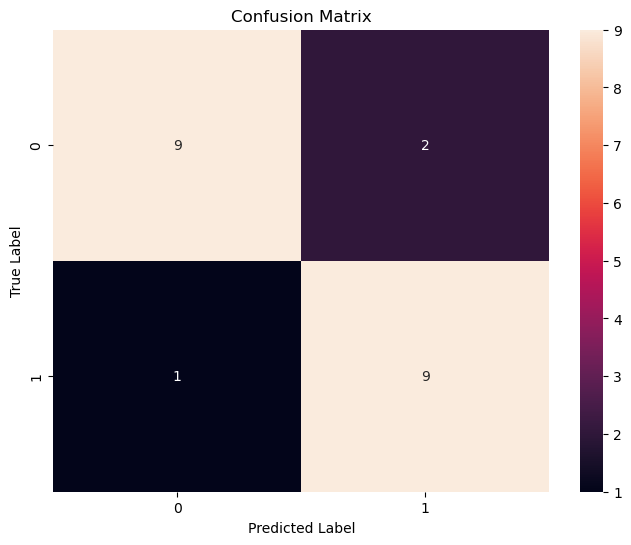

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y, predict)

# Get the class labels
class_labels = np.unique(y)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Generate appropriate evaluation metrics (e.g., accuracy, precision, recall, F1 score) 

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y, predict)

# Calculate precision
# Precision= tp/(tp+fp)
precision = precision_score(y, predict)

# Calculate recall
# Recall= tp/(tp+fn)
recall = recall_score(y, predict)

# Calculate F1 score
f1 = f1_score(y, predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8571428571428571
Precision: 0.8181818181818182
Recall: 0.9
F1 score: 0.8571428571428572


# 3-Grid Search for Hyperparameter Optimization

Perform a grid search
1. n_neighbors: Determines the number of neighbors to consider for making predictions. Smaller values make the model more sensitive to noise (overfitting), while larger values make it more biased (underfitting).

2. weights: Specifies how neighbors are weighted. 'Uniform' gives equal weight to all neighbors, while 'distance' weighs closer neighbors more heavily.

3. metric: Defines the distance metric used to calculate the dissimilarity between data points. Different metrics like 'hamming', 'euclidean', and 'manhattan' measure dissimilarity in various ways.

Construct a parameter grid and employ cross-validation techniques to evaluate different parameter combinations.

> If the metric is included in grid search, it may cause the SHAP analysis to fail.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

GSKNN = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(GSKNN, param_grid, cv=5)
grid_search.fit(train_X,train_y)
print("best parameter combinations:", grid_search.best_params_)
GSKNN = grid_search.best_estimator_
results = pd.DataFrame(grid_search.cv_results_)

print(results)

best parameter combinations: {'n_neighbors': 5, 'weights': 'uniform'}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.000200      0.000400         0.035019        0.000698   
1        0.000400      0.000490         0.035037        0.000582   
2        0.000405      0.000496         0.036620        0.002318   
3        0.000200      0.000400         0.034229        0.000510   
4        0.000200      0.000399         0.033918        0.000656   
5        0.000801      0.000400         0.034487        0.000571   
6        0.000399      0.000489         0.034862        0.001258   
7        0.000600      0.000490         0.034621        0.000740   
8        0.000200      0.000400         0.034120        0.000828   
9        0.000200      0.000400         0.034424        0.000590   
10       0.000403      0.000494         0.034625        0.000844   
11       0.000802      0.000401         0.034823        0.000521   

   param_n_neighbors param_weights  \
0      

In [96]:
predict = GSKNN.predict(test_X)

In [97]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, predict)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [98]:
df2 = pd.read_excel('Data.xlsx', sheet_name=5, skiprows=1)

features = df2.iloc[:, :-1]
labels = df2.iloc[:, -1]

X = features.values
y = labels.values

predict = GSKNN.predict(X)
accuracy = accuracy_score(y, predict)
print("Accuracy: ", accuracy)

Accuracy:  0.8571428571428571


# 4-SHAP Values for Feature Importance

Finally, the SHAP library was used to interpret the KNN model's predictions. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

The SHAP summary plot provides a holistic view of feature importance and what is driving it. The SHAP force plot visualizes the cumulative contribution of features to the prediction for individual instances.

In [ ]:
import shap
from sklearn.neighbors import KNeighborsClassifier

shap.initjs()

# Initialize the SHAP explainer
explainer = shap.KernelExplainer(KNN.predict_proba, train_features)

# Calculate SHAP values
shap_values = explainer.shap_values(train_features)

In [100]:
shap.force_plot(explainer.expected_value[0], shap_values[0], train_features)

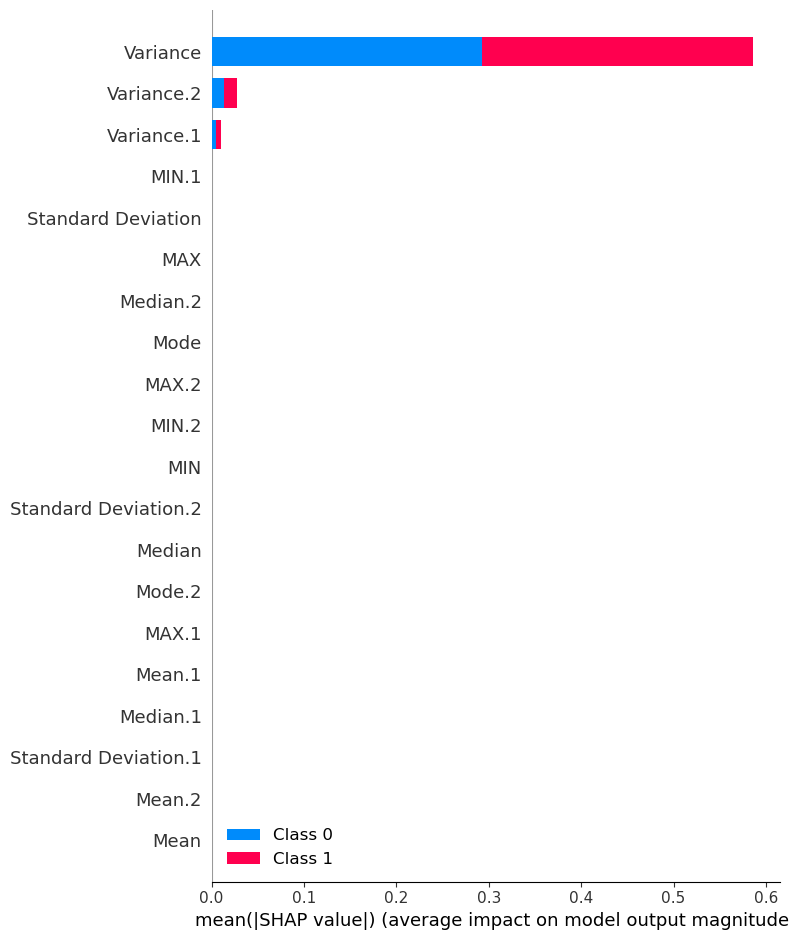

In [101]:
shap.summary_plot(shap_values, train_features, feature_names=train_features.columns)

A scatter plot was also generated using matplotlib, showing the relationship between the 'Variance' and 'Variance.1' features, with the predicted class of the samples represented by color.

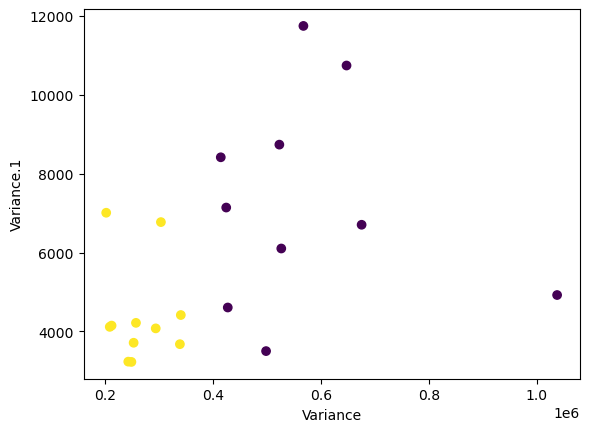

In [102]:
import matplotlib.pyplot as plt

plt.scatter(features.iloc[:,5],features.iloc[:,12], c = predict)
plt.xlabel('Variance')
plt.ylabel('Variance.1')
plt.show()